Accuracy: 0.984251968503937
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.96      0.98        46

    accuracy                           0.98       127
   macro avg       0.99      0.98      0.98       127
weighted avg       0.98      0.98      0.98       127



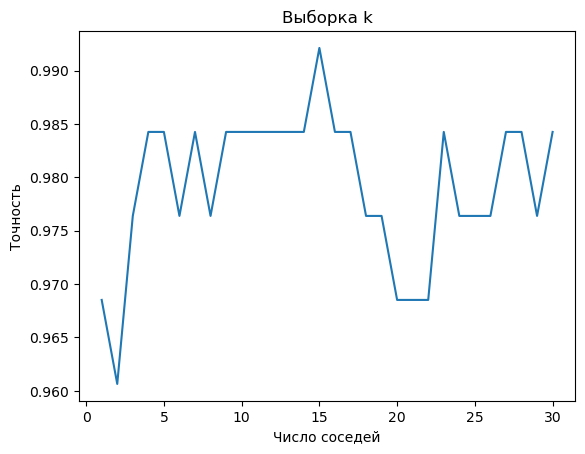

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

data = pd.read_csv('dataframe.csv')


data.drop('Unnamed: 9', axis=1, inplace = True) # пустые значения



data['Gender'] = data['Gender'].map({'M':0, 'F':1}) #параметризуем данные для более удобного анализа
X = data.drop('Success', axis=1)
y = data['Success']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разделение данных на обучающую и тестовую выборку


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Выбор оптимального k-значения
accuracy_arr = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_arr.append(accuracy)

plt.plot(range(1, 31), accuracy_arr)
plt.title('Выборка k')
plt.xlabel('Число соседей')
plt.ylabel('Точность')


#Использования алгоритма k-ближайших соседе
k = 15 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))



In [8]:
#Использование алгоритма дерева решений
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        46

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



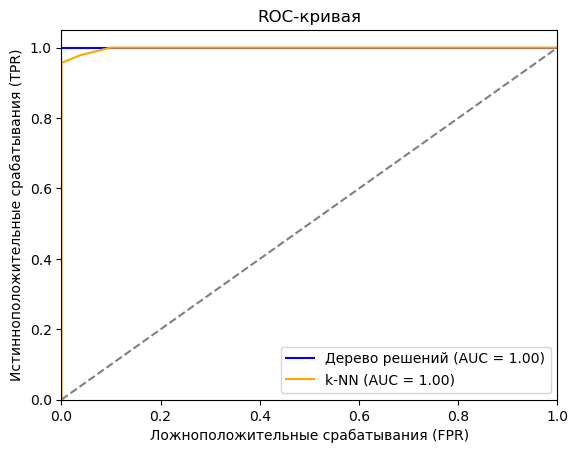

In [30]:
#Построение ROC-кривой

y_scores_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

y_scores_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.figure()
plt.plot(fpr_dt, tpr_dt, color='blue', label='Дерево решений (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_knn, tpr_knn, color='orange', label='k-NN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания (FPR)')
plt.ylabel('Истинноположительные срабатывания (TPR)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

    Выводы:
    
Алгоритм дерева решений показало значения Accuracy, Presicion, Recall, F-measure и Roc равными 1, что означает верность определения зачета\незачета учеников. Набор был поделен на тестовую и обучающую выборку, поэтому можно сказать, что модель не переобучена. 


Данный алгоритм так же лучше подходит для разделения набора данных на более простые группы (классы). В моем выбранном наборе данных, метка определяется достаточно просто. основе.

Алгоритм k-ближайших соседей показал значение, приближенно равное 0.98.

    Для класса 1:

1) Precision: 1.00, что означает, что все предсказания класса 1 были верными.

2) Recall: 0.96, что указывает на то, что модель пропустила 4% истинных положительных случаев.

3) F1-score: 0.98, что также указывает на хороший баланс, но немного ниже, чем у дерева решений.

    Для класса 0:

1) Precision: 0.98, что означает, что 98% предсказаний класса 0 были верными.

2) Recall: 1.00, что говорит о том, что все истинные случаи класса 0 были правильно классифицированы.

3) F1-score: 0.99, что указывает на хороший баланс между точностью и полнотой.


В данном случае алгоритм kNN будет менее эффективен для создания модели на его основе.